In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from bs4 import BeautifulSoup
import csv
from datetime import datetime


url = "http://quotes.toscrape.com/"
response = requests.get(url)

with open("kq.txt", "w",encoding='utf-8') as f:
    f.write(response.text)


Mô tả ngắn gọn về cấu trúc của trang Web trên:<br>

Trang web "http://quotes.toscrape.com/" là một trang web chứa nhiều câu nói nổi tiếng của các tác giả.<br>
Các câu nói được hiển thị theo định dạng trang trí đẹp mắt và đi kèm với tên tác giả và thông tin về tác giả.<br>
Trang web có thể được cào dữ liệu bằng các thẻ html, với mỗi câu nói được đóng trong thẻ 'div' có class là "quote"

In [2]:

with open("kq.txt", "r",encoding='utf-8') as f:
    content = f.read()
    soup = BeautifulSoup(content, "html.parser")
    result = soup.find_all("div", class_="quote")
    print(result)


[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>, <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<span>by <small class="author" itemprop="author">J.K.

In [3]:
authors = [item.find("small", class_="author").text for item in result]
print(authors)

['Albert Einstein', 'J.K. Rowling', 'Albert Einstein', 'Jane Austen', 'Marilyn Monroe', 'Albert Einstein', 'André Gide', 'Thomas A. Edison', 'Eleanor Roosevelt', 'Steve Martin']


In [4]:

ds = []
def tacgiaLink():
    for item in result:
        author = item.find("small", class_="author").text
        link = item.find("a")["href"]
        response = requests.get(url+link)
        soup = BeautifulSoup(response.content,'html.parser')
        dob = soup.find("span", class_="author-born-date").text
        quote = item.find("span", class_="text").text.strip()
        print("Tác giả:", author)
        print("Link tác giả:", "http://quotes.toscrape.com" + link)
        print("Ngày sinh:", dob)
        print("Câu nói nổi tiếng:", quote)
        print("\n")
        data = {
            'Tacgia':author,
            'Link':url+link,
            'Ngaysinh':dob,
            'Quote':quote
        }
        ds.append(data)
        

tacgiaLink()

Tác giả: Albert Einstein
Link tác giả: http://quotes.toscrape.com/author/Albert-Einstein
Ngày sinh: March 14, 1879
Câu nói nổi tiếng: “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”


Tác giả: J.K. Rowling
Link tác giả: http://quotes.toscrape.com/author/J-K-Rowling
Ngày sinh: July 31, 1965
Câu nói nổi tiếng: “It is our choices, Harry, that show what we truly are, far more than our abilities.”


Tác giả: Albert Einstein
Link tác giả: http://quotes.toscrape.com/author/Albert-Einstein
Ngày sinh: March 14, 1879
Câu nói nổi tiếng: “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”


Tác giả: Jane Austen
Link tác giả: http://quotes.toscrape.com/author/Jane-Austen
Ngày sinh: December 16, 1775
Câu nói nổi tiếng: “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”


Tác giả: Marilyn Monroe
Link t

In [5]:

url = 'http://quotes.toscrape.com/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
ds=[]
quotes = []
while len(quotes) < 40:
    for quote in soup.find_all('div', class_='quote'):
        author_name = quote.find("small", class_="author").text
        author_link = quote.find("a")["href"]
        author_url = url + author_link
        author_response = requests.get(author_url)
        author_soup = BeautifulSoup(author_response.content, 'html.parser')
        author_dob = author_soup.find('span', class_='author-born-date').text
        author_quote = quote.find('span', class_='text').text.strip()
        data = {
            'Tacgia':author_name,
            'Link':author_url,
            'Ngaysinh':author_dob,
            'Quote':author_quote
        }
        ds.append(data)
        quotes.append(author_quote)
    next_button = soup.find('li', class_='next')
    if next_button:
        next_link = next_button.find('a')['href']
        next_url = url + next_link
        response = requests.get(next_url)
        soup = BeautifulSoup(response.content, 'html.parser')
    else:
        break
df=pd.DataFrame(ds)
df.to_csv("Quote.csv",encoding='utf-8',index=False)

In [6]:

df = pd.read_csv('Quote.csv')
# Thêm cột STT với giá trị từ 1 đến số lượng dòng
df.insert(0, 'STT', range(1, 1 + len(df)))

# Lưu dataframe vào file csv
df.to_csv('Quote.csv', index=False)

In [7]:

df = pd.read_csv('Quote.csv')
ds=[]
for i in df['Ngaysinh']:
    dob = datetime.strptime(i, "%B %d, %Y")
    age = (datetime.now() - dob).days // 365
    ds.append(age)
df['Tuoi']=ds

df.to_csv('Quote.csv',index=False)    
        

In [8]:


df = pd.read_csv("Quote.csv")

# Thống kê số lượng câu nói của mỗi tác giả
author_count = df['Tacgia'].value_counts()
print("Số lượng câu nói của tác giả:\n",author_count)


Số lượng câu nói của tác giả:
 Albert Einstein        7
J.K. Rowling           5
Bob Marley             3
Dr. Seuss              3
Marilyn Monroe         2
Mother Teresa          2
Allen Saunders         1
Jorge Luis Borges      1
William Nicholson      1
Charles M. Schulz      1
Jim Henson             1
Garrison Keillor       1
Ralph Waldo Emerson    1
Pablo Neruda           1
Friedrich Nietzsche    1
Mark Twain             1
Elie Wiesel            1
Douglas Adams          1
Steve Martin           1
Eleanor Roosevelt      1
Thomas A. Edison       1
André Gide             1
Jane Austen            1
George Eliot           1
Name: Tacgia, dtype: int64


In [9]:
# thống kê độ dài của các câu nói
df['Dodai'] = df['Quote'].apply(lambda x: len(x.split()))
print(df['Dodai'])

0      21
1      16
2      26
3      19
4      16
5      14
6      19
7      12
8      19
9       9
10    201
11     23
12     15
13    138
14     16
15     22
16     37
17     16
18     13
19     12
20     66
21     12
22     11
23     24
24     27
25     19
26     25
27     32
28     13
29     13
30     21
31     21
32     19
33     17
34     11
35     14
36      7
37      9
38     12
39     12
Name: Dodai, dtype: int64


In [10]:
# Thống kê số lượng từ trong mỗi câu nói
word_count = df['Quote'].apply(lambda x: len(str(x).split(" ")))
print("Số lượng từ trong mỗi câu nói",word_count.describe())

Số lượng từ trong mỗi câu nói count     40.000000
mean      26.225000
std       35.460695
min        7.000000
25%       12.750000
50%       16.500000
75%       22.250000
max      201.000000
Name: Quote, dtype: float64


In [11]:
# Thống kê câu nói dài nhất, câu nói ngắn nhất
longest_quote = df.loc[df['Quote'].str.len().idxmax()]
shortest_quote = df.loc[df['Quote'].str.len().idxmin()]

print('Câu nói dài nhất: ')
print(longest_quote['Quote'])
print('Câu nói ngắn nhất: ')
print(shortest_quote['Quote'])

Câu nói dài nhất: 
“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yourself, because if you don't, then who will, sweetie? So keep your head high, keep your chin up, an

In [12]:
# thống kê các từ phổ biến

all_quotes = ' '.join(df['Quote'])
all_quotes_words = all_quotes.split()

word_freq = Counter(all_quotes_words)
most_common_words = word_freq.most_common(10)

print('10 từ phổ biến nhất trong các câu nói: ')
for word, count in most_common_words:
    print(word, count)

10 từ phổ biến nhất trong các câu nói: 
you 47
is 36
to 33
a 23
of 21
that 17
not 17
the 16
be 15
and 15


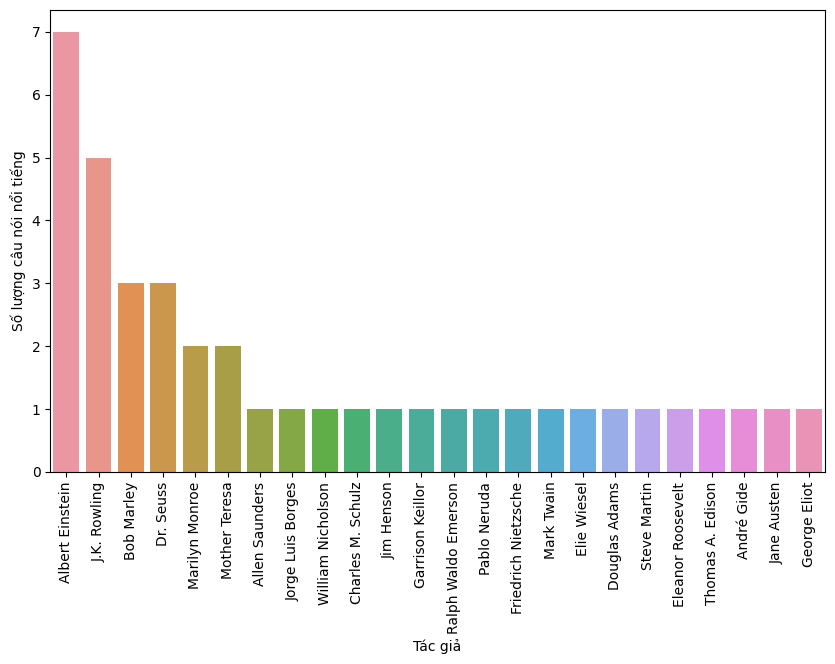

In [13]:
quote_count_by_author = df['Tacgia'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=quote_count_by_author.index, y=quote_count_by_author.values)
plt.xticks(rotation=90)
plt.xlabel('Tác giả')
plt.ylabel('Số lượng câu nói nổi tiếng')
plt.show()

In [14]:
import pandas as pd

df = pd.read_csv('Quote.csv')


In [15]:

# Chuyển đổi kiểu dữ liệu cột Tuoi sang kiểu số nguyên
df['Tuoi'] = df['Tuoi'].astype(int)

# Chuyển đổi kiểu dữ liệu cột DoDaiCauNoi sang kiểu số nguyên
df['DoDaiCauNoi'] = df['Quote'].apply(lambda x: len(x.split()))
# Lựa chọn các cột cần phân tích
cols_to_analyze = ['Tuoi', 'DoDaiCauNoi']
# Loại bỏ các dòng có giá trị bị thiếu
df = df.dropna(subset=cols_to_analyze)



In [16]:
from sklearn.cluster import KMeans

# Lựa chọn số lượng cụm
n_clusters = 3

# Khởi tạo đối tượng KMeans
kmeans = KMeans(n_clusters=n_clusters)

# Tiến hành phân tích gom cụm
kmeans.fit(df[cols_to_analyze])

# Lưu nhãn của từng điểm dữ liệu vào cột 'Cluster'
df['Cluster'] = kmeans.labels_


C:\Users\onsra02\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


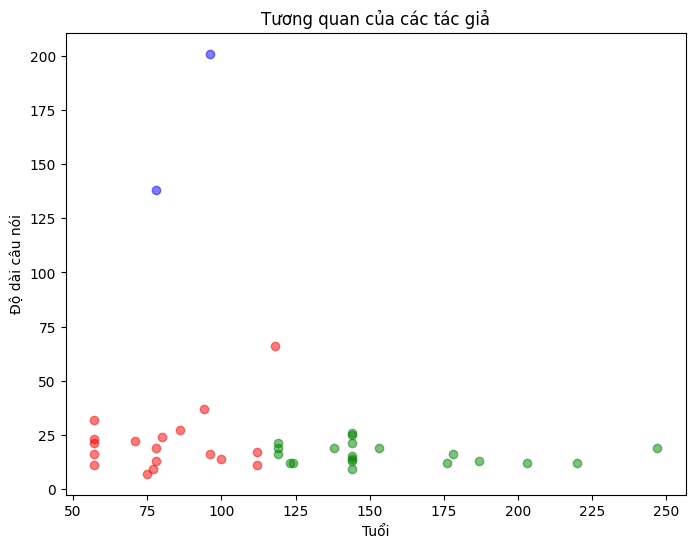

In [17]:
import matplotlib.pyplot as plt

# Lấy giá trị của cột 'Tuoi' và 'DoDaiCauNoi' của từng cụm
cluster_data = [df.loc[df['Cluster'] == i, cols_to_analyze] for i in range(n_clusters)]

# Tạo biểu đồ scatter
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(n_clusters):
    ax.scatter(cluster_data[i]['Tuoi'], cluster_data[i]['DoDaiCauNoi'], c=colors[i], alpha=0.5)

# Đặt tiêu đề và nhãn trục
ax.set_title('Tương quan của các tác giả')
ax.set_xlabel('Tuổi')
ax.set_ylabel('Độ dài câu nói')

# Hiển thị biểu đồ
plt.show()





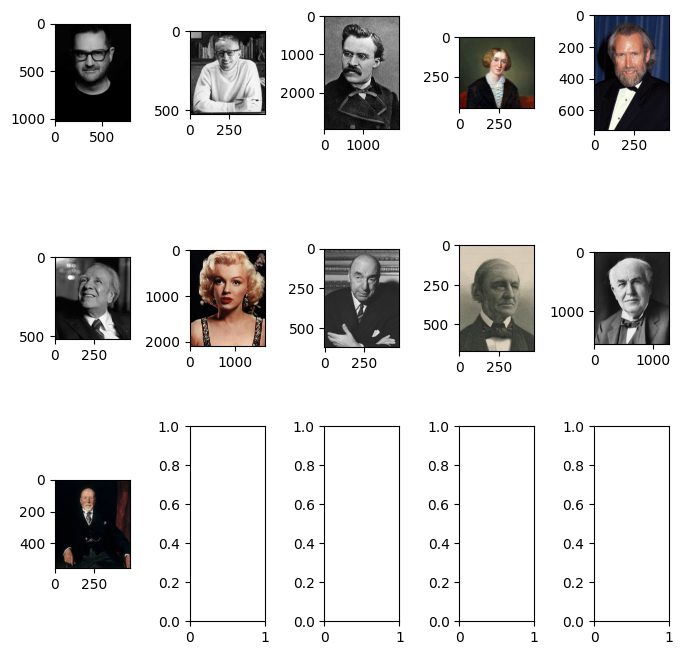

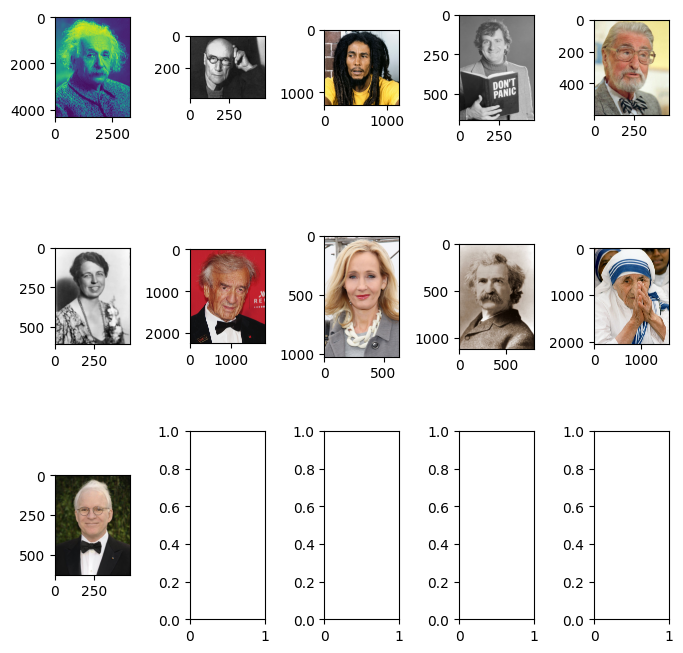

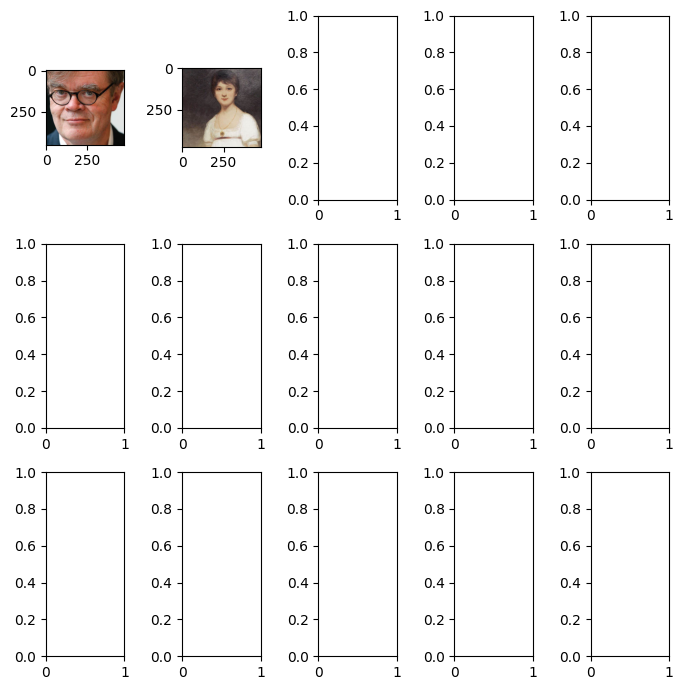

In [51]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import cv2
from sklearn.cluster import KMeans


# Lấy danh sách tên các file ảnh
c_data_path = './IMAGE/'
L = os.listdir(c_data_path)

# Thiết lập số lượng ảnh trong mỗi hàng và cột
n_row = 3
n_col = 5


# Tạo file ảnh cho mỗi cụm
for i in range(n_clusters):
    # Lấy danh sách các tên file ảnh thuộc cụm i
    img_list = [filename for filename, label in zip(L, kmeans.labels_) if label == i]

    # Hiển thị các ảnh trong cụm i
    _, axs = plt.subplots(n_row, n_col, figsize=(7, 7))
    axs = axs.flatten()
    for img, ax in zip(img_list[:36], axs):
        ax.imshow(mpimg.imread(os.path.join(c_data_path,img)))
        # Lấy giá trị trung bình của cột 'Tuoi' và 'DoDaiCauNoi' của cụm i
        avg_tuoi = df.loc[df['Cluster'] == i, 'Tuoi'].mean()
        avg_do_dai_cau_noi = df.loc[df['Cluster'] == i, 'DoDaiCauNoi'].mean()
    plt.tight_layout()
    plt.show()


In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load dữ liệu từ file CSV
data = pd.read_csv('Quote.csv')

# Khởi tạo CountVectorizer để trích xuất đặc trưng từ câu nói nổi tiếng
vectorizer = CountVectorizer(stop_words='english')

# Tạo ma trận đặc trưng bằng cách trích xuất tần suất xuất hiện của các từ khóa trong câu nói nổi tiếng
X = vectorizer.fit_transform(data['Quote'])

# Hiển thị danh sách các từ khóa đã trích xuất
features = list(vectorizer.vocabulary_.keys())
print('Danh sách các từ khóa đã trích xuất: \n', features)

# Hiển thị ma trận đặc trưng
print('Ma trận đặc trưng: \n', X.toarray())


Danh sách các từ khóa đã trích xuất: 
 ['world', 'created', 'process', 'thinking', 'changed', 'changing', 'choices', 'harry', 'truly', 'far', 'abilities', 'ways', 'live', 'life', 'miracle', 'person', 'gentleman', 'lady', 'pleasure', 'good', 'novel', 'intolerably', 'stupid', 'imperfection', 'beauty', 'madness', 'genius', 'better', 'absolutely', 'ridiculous', 'boring', 'try', 'man', 'success', 'value', 'hated', 'loved', 'failed', 've', 'just', '10', '000', 'won', 'work', 'woman', 'like', 'tea', 'bag', 'know', 'strong', 'hot', 'water', 'day', 'sunshine', 'night', 'make', 'matter', 'going', 'mess', 'universal', 'truth', 'decide', 'girls', 'friends', 'll', 'act', 'remember', 'come', 'ones', 'stay', 'true', 'best', 'don', 'let', 'sisters', 'lovers', 'baby', 'hate', 'say', 'actually', 'pretty', 'break', 'heart', 'soulmate', 'half', 'makes', 'goes', 'fail', 'doesn', 'mean', 'gonna', 'trying', 'hold', 'believe', 'sweetie', 'head', 'high', 'chin', 'importantly', 'smiling', 'beautiful', 'thing', 

In [40]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Chuẩn bị dữ liệu
data = pd.read_csv('Quote.csv')
X = data['Quote']
y = data['Tacgia']

# Tiền xử lý dữ liệu
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)

# Chia bộ dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)

# Dự đoán tên tác giả từ câu nói mới
new_text = "Good friends, good books, and a sleepy conscience: this is the ideal life."
X_new = vectorizer.transform([new_text])
y_pred = model.predict(X_new)

print("Tác giả: ",y_pred[0])

# Đánh giá mô hình trên tập kiểm tra
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Tỉ lệ phù hợp trên tập kiểm tra:{:.2}%'.format(accuracy*100))


Tác giả:  Mark Twain
Tỉ lệ phù hợp trên tập kiểm tra: 0.125


In [35]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('Quote.csv')
# Tính ma trận tần suất xuất hiện của từ cho toàn bộ dữ liệu
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Quote'])

# Tính ma trận cosine similarity giữa các tác giả
authors = data['Tacgia'].unique()
n_authors = len(authors)
sim_matrix = np.zeros((n_authors, n_authors))
for i, author1 in enumerate(authors):
    idx1 = np.where(data['Tacgia'] == author1)[0]
    X1 = X[idx1, :]
    for j, author2 in enumerate(authors):
        idx2 = np.where(data['Tacgia'] == author2)[0]
        X2 = X[idx2, :]
        sim_matrix[i, j] = cosine_similarity(np.array(X1.sum(axis=0)), np.array(X2.sum(axis=0)))


# Tìm ra cặp tác giả có độ tương đồng lớn nhất
max_sim = 0
max_pair = ()
for i in range(n_authors):
    for j in range(i+1, n_authors):
        if sim_matrix[i, j] > max_sim:
            max_sim = sim_matrix[i, j]
            max_pair = (authors[i], authors[j])
print(f"Hai tác giả có phong cách nói tương đồng nhau nhất: {max_pair} (độ tương đồng = {max_sim:.2f})")


Hai tác giả có phong cách nói tương đồng nhau nhất: ('Albert Einstein', 'J.K. Rowling') (độ tương đồng = 0.56)
